In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from dotenv import load_dotenv
import os
load_dotenv()

from fredapi import Fred

#SKLEARN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression 



#Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

import matplotlib.pyplot as plt
import numpy as np


from scipy import stats

In [2]:
# env variable
api_key = os.getenv("FRED_API_KEY")
fred = Fred(api_key=api_key)

In [3]:
# FRED timeseries API map dictionary
fred_timeseries_mapping = {
    'CPIAUCSL': 'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average',
    'HOUST': 'New Privately-Owned Housing Units Started: Total Units',
    'CSUSHPINSA': 'S&P CoreLogic Case-Shiller U.S. National Home Price Index',
    'HPIPONM226S': 'Purchase Only House Price Index for the United States',
    'ETOTALUSQ176N': 'Housing Inventory Estimate: Total Housing Units in the United States',
    'USSTHPI': 'All-Transactions House Price Index for the United States',
    'WPUSI012011': 'Producer Price Index by Commodity: Special Indexes: Construction Materials',
    'ILSTHPI': 'All-Transactions House Price Index for Illinois',
    'MORTGAGE30US': '30-Year Fixed Rate Mortgage Average in the United States',
    'MORTGAGE15US': '15-Year Fixed Rate Mortgage Average in the United States',
    'MSACSR': 'Monthly Supply of New Houses in the United States',
    'MSPUS': 'Median Sales Price of Houses Sold for the United States'
}

start = "2000-01-01"
#end

dfs = []

for s in list(fred_timeseries_mapping.keys()):
    
    data = fred.get_series(s, observation_start=start)
    df = pd.DataFrame(data)

    df_grouped = df.groupby(by=[df.index.year, df.index.quarter]).mean()
    # display(df.isnull().any())
    dfs.append(df_grouped)
    
housing_data_df = pd.concat(dfs, axis=1)
housing_data_df.columns = list(fred_timeseries_mapping.keys())
housing_data_df.dropna(inplace=True)

display(housing_data_df.head(10))
display(housing_data_df.tail(10))

CPIAUCSL        HOUST  CSUSHPINSA  HPIPONM226S  ETOTALUSQ176N  \
2000 2  171.433333  1586.666667  103.699000   139.566667       116047.0   
     3  173.000000  1503.666667  106.459333   141.780000       116482.0   
     4  174.233333  1544.000000  108.270000   144.200000       116914.0   
2001 1  175.900000  1605.000000  109.750000   146.910000       117347.0   
     2  177.133333  1630.000000  112.241000   149.316667       117786.0   
     3  177.633333  1599.666667  114.893000   151.590000       118216.0   
     4  177.500000  1570.000000  115.858667   153.943333       118635.0   
2002 1  178.066667  1723.000000  117.094000   156.560000       119061.0   
     2  179.466667  1691.000000  120.776333   159.420000       119483.0   
     3  180.433333  1697.333333  124.636667   162.483333       119909.0   

        USSTHPI  WPUSI012011  ILSTHPI  MORTGAGE30US  MORTGAGE15US    MSACSR  \
2000 2   233.89   145.166667   245.58      8.316154      7.991538  4.533333   
     3   238.16   143.833333   249.63      8.020000      7.733077  4.166667   
     4   241.80   142.833333   252.46      7.620769      7.294615  3.933333   
2001 1   247.79   142.266667   255.77      7.006923      6.589231  3.766667   
     2   251.94   143.666667   260.21      7.130000      6.660000  4.033333   
     3   255.85   143.233333   265.05      6.963846      6.506923  4.333333   
     4   259.02   142.033333   267.50      6.770769      6.253077  4.066667   
2002 1   262.73   142.466667   272.12      6.971538      6.461538  4.100000   
     2   267.21   143.866667   276.94      6.813077      6.286154  4.166667   
     3   272.51   145.066667   280.51      6.289231      5.712308  4.033333   

           MSPUS  
2000 2  163200.0  
     3  168800.0  
     4  172900.0  
2001 1  169800.0  
     2  179000.0  
     3  172500.0  
     4  171100.0  
2002 1  188700.0  
     2  187200.0  
     3  178100.0

CPIAUCSL        HOUST  CSUSHPINSA  HPIPONM226S  ETOTALUSQ176N  \
2021 2  268.622667  1581.666667  255.498000   333.000000       141927.0   
     3  272.890000  1576.333333  268.593000   348.133333       142288.0   
     4  278.680333  1690.333333  276.106667   361.763333       142697.0   
2022 1  284.826000  1717.666667  288.086000   377.643333       143105.0   
     2  291.706333  1635.666667  305.479000   390.660000       143514.0   
     3  295.509000  1446.333333  303.747333   390.126667       143923.0   
     4  298.441000  1405.333333  296.664000   391.553333       144332.0   
2023 1  301.203000  1385.333333  294.520000   394.996667       144740.0   
     2  303.466667  1449.666667  305.039667   403.173333       145149.0   
     3  306.034333  1370.666667  311.367333   412.006667       145558.0   

        USSTHPI  WPUSI012011  ILSTHPI  MORTGAGE30US  MORTGAGE15US    MSACSR  \
2021 2   510.74   304.466667   385.96      3.003846      2.309231  5.366667   
     3   539.20   314.587000   399.44      2.872143      2.171429  6.066667   
     4   557.79   328.697333   408.73      3.079231      2.338462  6.133333   
2022 1   578.36   345.059000   419.56      3.822308      3.044615  6.333333   
     2   617.03   348.867000   445.57      5.266154      4.450769  8.766667   
     3   627.42   342.002333   450.94      5.623077      4.880769  9.500000   
     4   622.78   330.204667   446.16      6.664615      5.959231  9.200000   
2023 1   625.78   329.866333   449.78      6.372308      5.564615  8.200000   
     2   645.38   336.058333   468.27      6.510769      5.870769  7.433333   
     3   657.32   333.468000   479.38      7.040000      6.396154  7.500000   

           MSPUS  
2021 2  382600.0  
     3  411200.0  
     4  423600.0  
2022 1  433100.0  
     2  449300.0  
     3  468000.0  
     4  479500.0  
2023 1  429000.0  
     2  418500.0  
     3  435400.0

In [4]:
# Create X feature df
X = housing_data_df.copy().drop(columns='MSPUS')
X.head()

CPIAUCSL        HOUST  CSUSHPINSA  HPIPONM226S  ETOTALUSQ176N  \
2000 2  171.433333  1586.666667  103.699000   139.566667       116047.0   
     3  173.000000  1503.666667  106.459333   141.780000       116482.0   
     4  174.233333  1544.000000  108.270000   144.200000       116914.0   
2001 1  175.900000  1605.000000  109.750000   146.910000       117347.0   
     2  177.133333  1630.000000  112.241000   149.316667       117786.0   

        USSTHPI  WPUSI012011  ILSTHPI  MORTGAGE30US  MORTGAGE15US    MSACSR  
2000 2   233.89   145.166667   245.58      8.316154      7.991538  4.533333  
     3   238.16   143.833333   249.63      8.020000      7.733077  4.166667  
     4   241.80   142.833333   252.46      7.620769      7.294615  3.933333  
2001 1   247.79   142.266667   255.77      7.006923      6.589231  3.766667  
     2   251.94   143.666667   260.21      7.130000      6.660000  4.033333

In [5]:
#Create y target df
y = housing_data_df[['MSPUS']]
y.head()

MSPUS
2000 2  163200.0
     3  168800.0
     4  172900.0
2001 1  169800.0
     2  179000.0

In [6]:
split = round(abs(X.index.min()[0] - X.index.max()[0]) * 0.8)
split

18

In [7]:
# Slice data by date to split testing and training data

#Start
training_begin = X.index.min()[0]
training_end = X.index.min()[0] + split

display(training_begin)
display(training_end)

2000

2018

In [8]:
# Split the train data
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

X_train.tail()

CPIAUCSL        HOUST  CSUSHPINSA  HPIPONM226S  ETOTALUSQ176N  \
2017 4  247.238333  1235.666667  195.461667   248.006667       137637.0   
2018 1  249.321667  1298.000000  197.195000   252.636667       137920.0   
     2  250.679000  1275.000000  202.370333   255.630000       138203.0   
     3  251.686333  1248.666667  205.216667   258.863333       138488.0   
     4  252.711000  1165.666667  205.056667   261.856667       138778.0   

        USSTHPI  WPUSI012011  ILSTHPI  MORTGAGE30US  MORTGAGE15US    MSACSR  
2017 4   403.58   223.966667   335.72      3.922308      3.290769  5.300000  
2018 1   409.26   228.600000   337.40      4.282308      3.740000  5.633333  
     2   416.79   236.133333   339.57      4.544615      4.014615  5.633333  
     3   421.88   239.666667   340.73      4.566923      4.033846  6.366667  
     4   423.32   238.600000   340.14      4.784615      4.212308  7.066667

In [9]:
X_train.shape

(75, 11)

In [10]:
#Split the test data
X_test = X.loc[training_end+1:]
y_test = y.loc[training_end+1:]

X_test.isna().any()

CPIAUCSL         False
HOUST            False
CSUSHPINSA       False
HPIPONM226S      False
ETOTALUSQ176N    False
USSTHPI          False
WPUSI012011      False
ILSTHPI          False
MORTGAGE30US     False
MORTGAGE15US     False
MSACSR           False
dtype: bool

In [11]:
X_test.shape

(19, 11)

In [12]:
y_test.head()

MSPUS
2019 1  313000.0
     2  322500.0
     3  318400.0
     4  327100.0
2020 1  329000.0

In [13]:
import catboost as cb
from catboost import CatBoost
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [15]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [16]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [17]:
grid = {'iterations': [25, 50, 75],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 278979.7714643	test: 276955.5878725	best: 276955.5878725 (0)	total: 57.6ms	remaining: 1.38s
1:	learn: 270867.1460418	test: 269718.2416112	best: 269718.2416112 (1)	total: 58.1ms	remaining: 668ms
2:	learn: 263040.1746886	test: 262552.3281030	best: 262552.3281030 (2)	total: 58.5ms	remaining: 429ms
3:	learn: 255455.0642477	test: 254270.1597898	best: 254270.1597898 (3)	total: 58.7ms	remaining: 308ms
4:	learn: 248024.2382056	test: 246936.5696414	best: 246936.5696414 (4)	total: 58.8ms	remaining: 235ms
5:	learn: 240808.8042079	test: 239784.0535560	best: 239784.0535560 (5)	total: 58.9ms	remaining: 187ms
6:	learn: 233823.1044830	test: 232668.4256591	best: 232668.4256591 (6)	total: 59ms	remaining: 152ms
7:	learn: 227055.3333174	test: 225982.9166855	best: 225982.9166855 (7)	total: 59.1ms	remaining: 126ms
8:	learn: 220502.4116853	test: 220139.9970590	best: 220139.9970590 (8)	total: 59.2ms	remaining: 105ms
9:	learn: 214160.0972546	test: 214221.4145633	best: 214221.4145633 (9)	total: 60.2ms

{'params': {'depth': 4,
  'iterations': 75,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [18]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 8697.08
R2: 0.98


In [19]:
feature_importances = model.feature_importances_

In [20]:
feature_importances = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)

In [21]:
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

CPIAUCSL: 22.150060065286134
ETOTALUSQ176N: 20.63097468516269
WPUSI012011: 13.889572435234411
HPIPONM226S: 11.569672108998708
ILSTHPI: 8.739527774391826
CSUSHPINSA: 7.689273360295145
HOUST: 5.438094397670536
USSTHPI: 3.3177671868265
MORTGAGE30US: 2.9219846922581407
MSACSR: 2.3716555981845118
MORTGAGE15US: 1.2814176956914132


In [26]:
training_begin = X.index.min()[0]
training_end = X.index.min()[0] + split

display(training_begin)
display(training_end)

2000

2018

In [27]:
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

X_train.tail()

CPIAUCSL        HOUST  CSUSHPINSA  HPIPONM226S  ETOTALUSQ176N  \
2017 4  247.238333  1235.666667  195.461667   248.006667       137637.0   
2018 1  249.321667  1298.000000  197.195000   252.636667       137920.0   
     2  250.679000  1275.000000  202.370333   255.630000       138203.0   
     3  251.686333  1248.666667  205.216667   258.863333       138488.0   
     4  252.711000  1165.666667  205.056667   261.856667       138778.0   

        USSTHPI  WPUSI012011  ILSTHPI  MORTGAGE30US  MORTGAGE15US    MSACSR  
2017 4   403.58   223.966667   335.72      3.922308      3.290769  5.300000  
2018 1   409.26   228.600000   337.40      4.282308      3.740000  5.633333  
     2   416.79   236.133333   339.57      4.544615      4.014615  5.633333  
     3   421.88   239.666667   340.73      4.566923      4.033846  6.366667  
     4   423.32   238.600000   340.14      4.784615      4.212308  7.066667

In [28]:
#Split the test data
X_test = X.loc[training_end+1:]
y_test = y.loc[training_end+1:]

X_test.isna().any()

CPIAUCSL         False
HOUST            False
CSUSHPINSA       False
HPIPONM226S      False
ETOTALUSQ176N    False
USSTHPI          False
WPUSI012011      False
ILSTHPI          False
MORTGAGE30US     False
MORTGAGE15US     False
MSACSR           False
dtype: bool

In [29]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

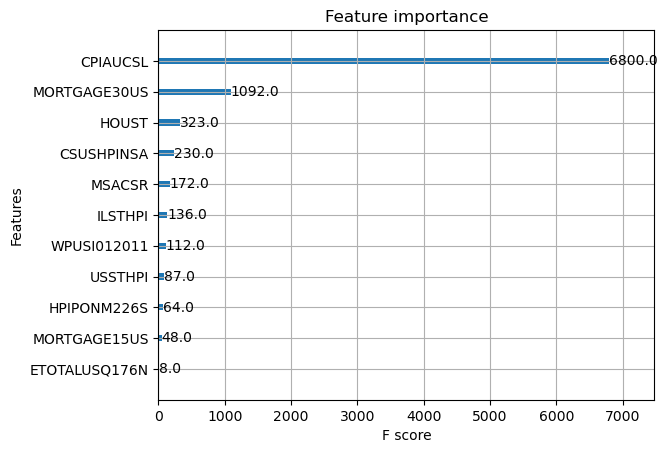

In [30]:
xgb.plot_importance(reg)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


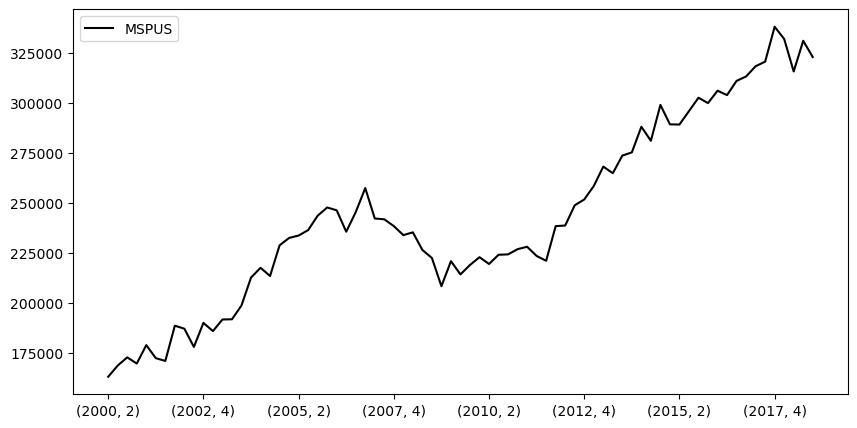

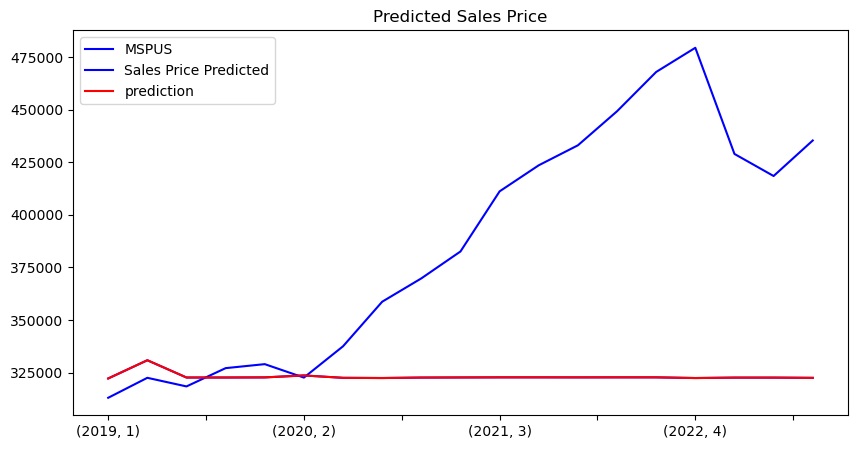

In [31]:
y_test['Sales Price Predicted'] = reg.predict(X_test)

y_train.plot(style='k', figsize=(10,5), label = 'train')
y_test.plot(style='b', figsize=(10,5), label = 'test')
y_test['Sales Price Predicted'].plot(style='r', figsize=(10,5), label = 'prediction')
plt.title('Predicted Sales Price')
plt.legend()

In [32]:
y_test['Sales Price Predicted'].head()

2019  1    322181.28125
      2    330857.31250
      3    322638.15625
      4    322640.59375
2020  1    322694.96875
Name: Sales Price Predicted, dtype: float32